In [22]:
""" Library Imports """
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## %matplotlib inline
plt.style.use ('fivethirtyeight')
import warnings

warnings.filterwarnings ('ignore')

In [23]:
''' Step 1'''

''' Loading Datasets '''

## Add url
abujaurl = 'https://raw.githubusercontent.com/Ustacky-dev/Pandas-Analytics-Project/main/Abuja_Branch.csv'
lagosurl = 'https://raw.githubusercontent.com/Ustacky-dev/Pandas-Analytics-Project/main/Lagos_Branch.csv'
phurl = 'https://raw.githubusercontent.com/Ustacky-dev/Pandas-Analytics-Project/main/Port_Harcourt_Branch.csv'

## Convert to csv
abujadata = pd.read_csv (abujaurl)
lagosdata = pd.read_csv (lagosurl)
phdata = pd.read_csv (phurl)

data = pd.concat ([abujadata, lagosdata, phdata])
print (data.info ())
print ('*' * 100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 327
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [24]:
''' Step 2'''

''' Data Exploration '''

## Head Display
print (data.head ())
print ('*' * 100)

## Number of rows and columns
print (f'Number of rows: {data.shape[0]} and Number of columns {data.shape[1]}')
print ('*' * 100)

## Head Display
print (data.columns)
print ('*' * 100)

## Data Description
print (data.describe ())
print ('*' * 100)

## Findings from summary
print ("The total transactions made : " + str (data['Unit price'].describe ().get ('count')))
print ("The maximum unit price sold is : " + str (data['Unit price'].describe ().get ('max')))
print ("The average unit price sold is : " + str (data['Unit price'].describe ().get ('mean')))
print ("The maximum quantity sold is : " + str (data['Quantity'].describe ().get ('max')))
print ("The average quantity sold is : " + str (data['Quantity'].describe ().get ('mean')))
print ("The biggest income gotten is : " + str (data['gross income'].describe ().get ('max')))
print ('*' * 100)

## Has na
print (data.isnull ().sum ())
print ('*' * 100)

## Data information
print (data.info ())
print ('*' * 100)

    Invoice ID Branch   City Customer type  Gender            Product line  \
0  692-92-5582      B  Abuja        Member  Female      Food and beverages   
1  351-62-0822      B  Abuja        Member  Female     Fashion accessories   
2  529-56-3974      B  Abuja        Member    Male  Electronic accessories   
3  299-46-1805      B  Abuja        Member  Female       Sports and travel   
4  319-50-3348      B  Abuja        Normal  Female      Home and lifestyle   

   Unit price  Quantity    Tax 5%      Total       Date   Time Payment  \
0     19742.4         3   2961.36   62188.56  2/20/2019  13:27    Card   
1      5212.8         4   1042.56   21893.76   2/6/2019  18:07    Epay   
2      9183.6         4   1836.72   38571.12   3/9/2019  17:03    Cash   
3     33739.2         6  10121.76  212556.96  1/15/2019  16:19    Cash   
4     14508.0         2   1450.80   30466.80  3/11/2019  15:30    Epay   

       cogs  gross margin percentage  gross income  Rating  
0   59227.2              

In [25]:
''' Step 3'''

''' Dealing with DateTime Features '''

data['Date'] = pd.to_datetime (data['Date'] + ' ' + data['Time'])

## Drop time so that datetime can be complete

data.drop ('Time', inplace=True, axis=1)

## Check Datetime type implemented

print (data.info ())
print ('*' * 100)

## Get Year, Month, Day, Hours

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hours'] = data['Date'].dt.hour

## Get Unique number of hours

Hours = data['Hours'].unique ()
print (f'Unique sales hours are => {Hours} ')
print ('*' * 100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 327
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Payment                  1000 non-null   object        
 12  cogs                     1000 non-n

In [27]:
''' Step 4'''

''' Unique Values in Columns '''

## Get category column


category_columns = [col for col in data.columns if data[col].dtype == 'object']
print (category_columns)
print ('*' * 100)

## return category values values in category

for col in data.columns:
    if col == 'Invoice ID':
        continue
    if data[col].dtype == 'object':
        print (f'The unique values in  {col} Column are : {format (data[col].unique ().tolist ())}')

print ('*' * 100)

## return category values in category

for col in data.columns:
    if col == 'Invoice ID':
        continue
    if data[col].dtype == 'object':
        print (f'Total Number of unique values in the {col} Column : {len (data[col].unique ().tolist ())}')

print ('*' * 100)

## return category values using value_counts()

for col in data.columns:
    if col == 'Invoice ID':
        continue
    if data[col].dtype == 'object':
        print(f'For unique values in {col} :')
        print (data[col].value_counts ())
        print ('*' * 100)

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
****************************************************************************************************
The unique values in  Branch Column are : ['B', 'A', 'C']
The unique values in  City Column are : ['Abuja', 'Lagos', 'Port Harcourt']
The unique values in  Customer type Column are : ['Member', 'Normal']
The unique values in  Gender Column are : ['Female', 'Male']
The unique values in  Product line Column are : ['Food and beverages', 'Fashion accessories', 'Electronic accessories', 'Sports and travel', 'Home and lifestyle', 'Health and beauty']
The unique values in  Payment Column are : ['Card', 'Epay', 'Cash']
****************************************************************************************************
Total Number of unique values in the Branch Column : 3
Total Number of unique values in the City Column : 3
Total Number of unique values in the Customer type Column : 2
Total Number of unique v

In [65]:
''' Step 5'''

''' Aggregation with GroupBy '''

## Group by city

## Sum ,Mean, Gross income of each city and highest pay
City = data.groupby ('City')
CityData = City.agg ({
    'Total': ['sum', 'mean'],
    'gross income': ['sum', 'max'],
    'Unit price': ['max', 'min'],
    'Quantity': ['sum', 'mean']
    })
print(CityData)
print ('*' * 100)
## city with the highest income
Maxvalue = CityData['gross income']['max'].max() # Find max value
highestcity = CityData['gross income']['max']==Maxvalue # get value as boolean
print(highestcity)
print ('*' * 100)
highestcity = CityData[highestcity].index.item()
print(f'City with the highest gross income is => {highestcity} city')

                     Total                gross income          Unit price  \
                       sum           mean          sum      max        max   
City                                                                         
Abuja          38231161.92  115154.102169   1820531.52  17528.4    35985.6   
Lagos          38232133.38  112447.451118   1820577.78  17816.4    35938.8   
Port Harcourt  39804734.34  121355.897378   1895463.54  17874.0    35985.6   

                      Quantity            
                  min      sum      mean  
City                                      
Abuja          3812.4     1820  5.481928  
Lagos          3628.8     1859  5.467647  
Port Harcourt  3657.6     1831  5.582317  
****************************************************************************************************
City
Abuja            False
Lagos            False
Port Harcourt     True
Name: max, dtype: bool
***************************************************************************

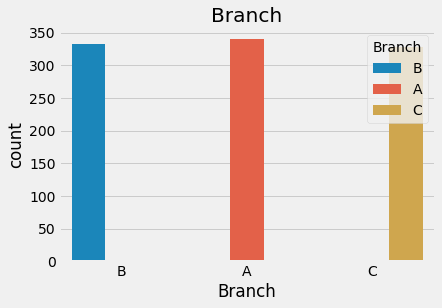

Branch A has the highest number of transactions
Epay is the best payment channel from which purchases are made
Branch B has the lowest rating


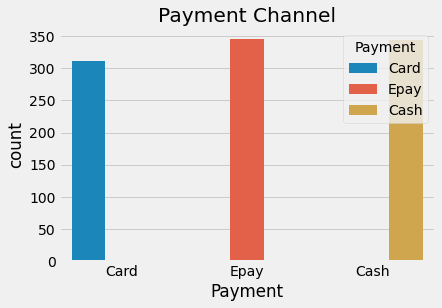

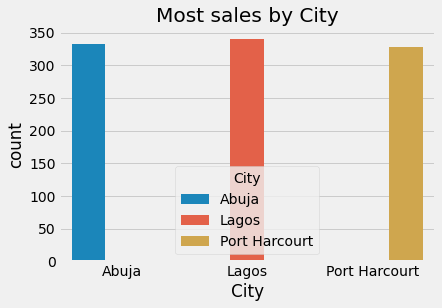

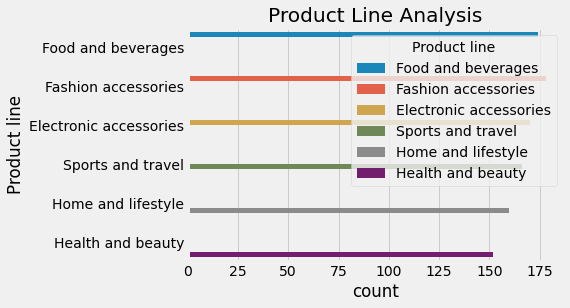

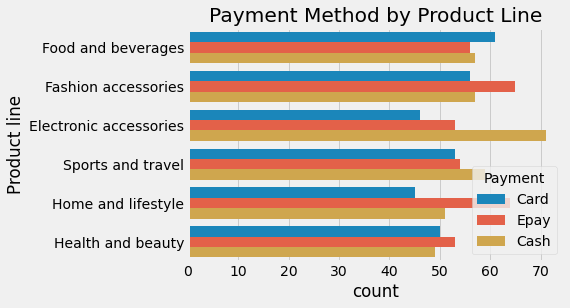

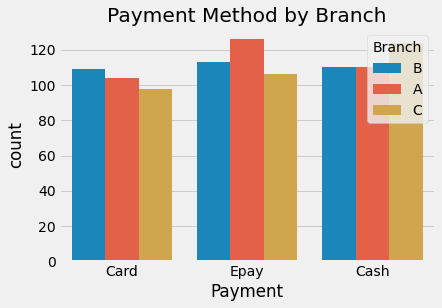

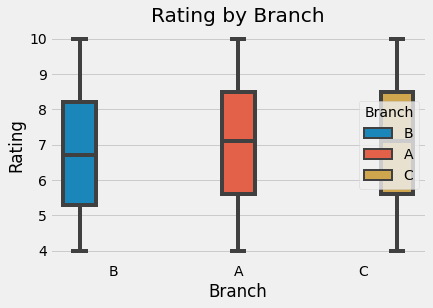

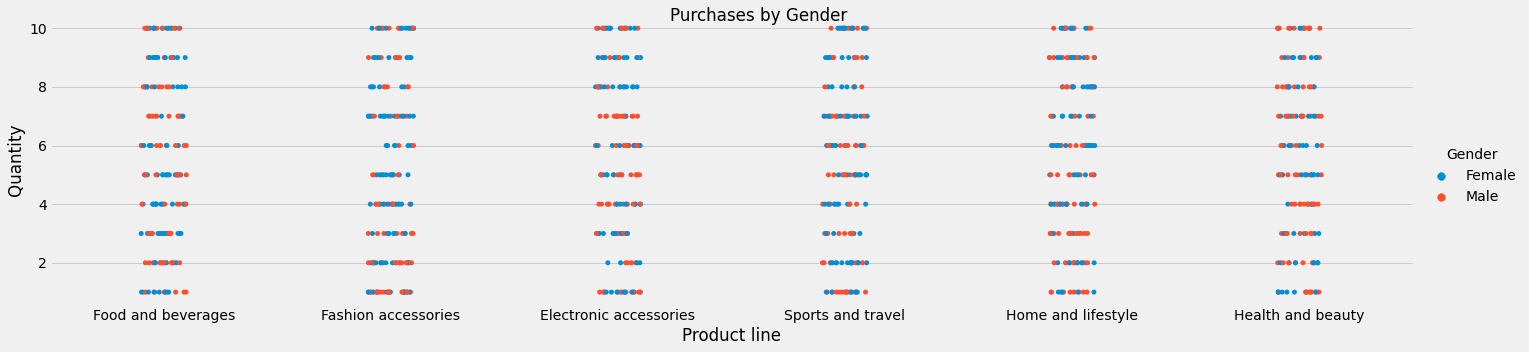

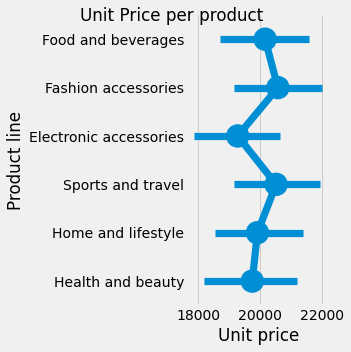

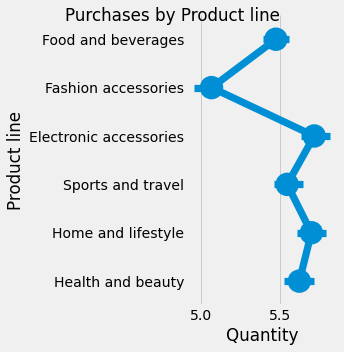

In [75]:
''' Step 6'''

''' Data Visualization '''

## Countplot for Branch

sns.countplot (x='Branch', hue='Branch', data=data).set_title ('Branch')

plt.show ()

print('Branch A has the highest number of transactions')

## Countplot for Payment Channel used the most
sns.countplot (x='Payment', hue='Payment', data=data).set_title ('Payment Channel')
plt.show ()

print('Epay is the best payment channel from which purchases are made')

## Countplot for city with most sales
sns.countplot (x='City', hue='City', data=data).set_title ('Most sales by City')
plt.show ()

## Countplot for product line analysis
sns.countplot (y='Product line', hue='Product line', data=data).set_title ('Product Line Analysis')
plt.show ()

## Countplot for Payment method on product line
sns.countplot (y='Product line', hue='Payment', data=data).set_title ('Payment Method by Product Line')
plt.show ()

## Countplot for Payment method for each branch
sns.countplot (x='Payment', hue='Branch', data=data).set_title ('Payment Method by Branch')
plt.show ()

## Box plot for Branch with the lowest rating
sns.boxplot (x='Branch', y='Rating', hue='Branch', data=data).set_title ('Rating by Branch')
plt.show ()

print ('Branch B has the lowest rating')

## Product type purchased by gender
sns.catplot (x='Product line', y='Quantity', hue='Gender', data=data, aspect=4).fig.suptitle ('Purchases by Gender')
plt.show ()

## Total sales by gender
## sns.catplot (x='Total', y='Quantity', hue='Gender', data=data, aspect=4).fig.suptitle('Total Sales to Gender')
##plt.show ()

## Please note, I had to block the above code as Its taking a long time to run the whole scipte section

## Unit price per product
sns.catplot (x='Unit price', y='Product line', data=data, kind='point').fig.suptitle ('Unit Price per product')
plt.show ()

## Product type per quantity
sns.catplot (x='Product line', y='Quantity', data=data, kind='point',ci = 30).fig.suptitle ('Purchases by Product line')
plt.show ()

## Please note, .set_title was not working for some visuals hence I had to research and ".fig.suptitle" worked

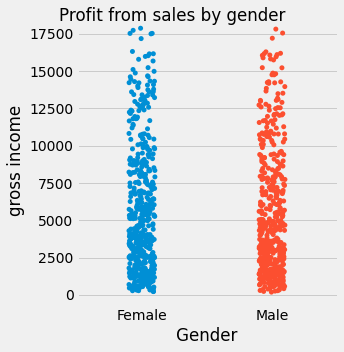

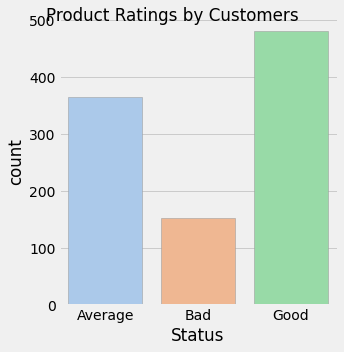

      Invoice ID Branch           City Customer type  Gender  \
0    692-92-5582      B          Abuja        Member  Female   
1    351-62-0822      B          Abuja        Member  Female   
2    529-56-3974      B          Abuja        Member    Male   
3    299-46-1805      B          Abuja        Member  Female   
4    319-50-3348      B          Abuja        Normal  Female   
..           ...    ...            ...           ...     ...   
323  148-41-7930      C  Port Harcourt        Normal    Male   
324  189-40-5216      C  Port Harcourt        Normal    Male   
325  267-62-7380      C  Port Harcourt        Member    Male   
326  652-49-6720      C  Port Harcourt        Member  Female   
327  233-67-5758      C  Port Harcourt        Normal    Male   

               Product line  Unit price  Quantity    Tax 5%      Total  ...  \
0        Food and beverages     19742.4         3   2961.36   62188.56  ...   
1       Fashion accessories      5212.8         4   1042.56   21893.76  .

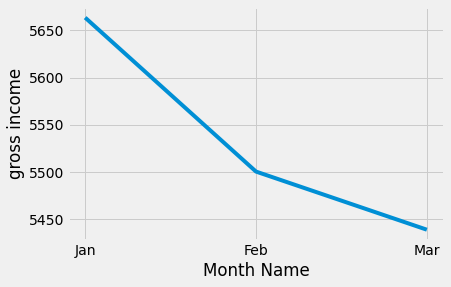

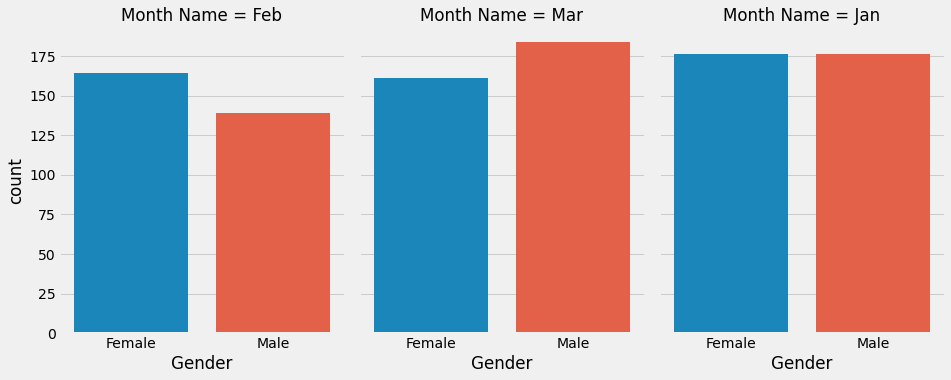

In [73]:
''' Step 7'''

''' StandOut Section '''

''' Summary '''
# Approach
## Month Name = Addition of month name to the dataframe in other to carryout analysis on monthly patterns
## Gender Analysis = Carryout some analysis on purchases/transactions made by both male and female
## Ratings = Analyze ratings based on specific assigned categories

# Methods
## Month Name : by extracting the month name from the date column using the method .dt.month_name ().str[:3]
## I can be able to plot # average gross income

## Gender Analysis: Using the catplot, gender is categorized into male and female and gross income gotten as a result
## of sales # to both gender can be analyzed
## Ratings : Ratings were categorized into Good,Average and Bad, analyzing the occurrences is done by using the catplot

## Profit from gender purchase of products

sns.catplot (x="Gender", y="gross income", order=["Female", "Male"], data=data).fig.suptitle ('Profit from sales by gender')
plt.show ()

## Tag Ratings

data['Status'] = ['Bad' if col < 5 else 'Good' if col > 7 else 'Average' for col in data['Rating']]


## Sales performance by status

sns.catplot (x="Status", kind="count",
             palette="pastel", edgecolor=".6",
             data=data).fig.suptitle ('Product Ratings by Customers')
plt.show ()

## Month name for time series

data['Month Name'] = data['Date'].dt.month_name ().str[:3]
print (data)
## Sales performance by Month

Mdata = data.groupby (['Month Name', 'Year', 'Month'])['gross income'].mean ().reset_index ()
Mdata = Mdata.sort_values ('Month', ascending=True)
print (Mdata)

sns.lineplot (data=Mdata, x="Month Name", y='gross income')
plt.show ()

## Number of transactions by Gender

sns.catplot (x="Gender", col="Month Name", col_wrap=4,
             data=data,
             kind="count", height=5.5, aspect=.8)
plt.show ()

## For some reasons I can't set titles in my plotting above


